In [15]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [11]:
import sys, os
sys.path.append('..')

import numpy as np
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score
from sklearn.grid_search import GridSearchCV
from matplotlib import pyplot as plt

from get_data import get_data, get_splitted_data
from models.active_model import ActiveLearningExperiment
from models.strategy import *
from models.utils import ObstructedY

from misc.config import c
data_dir = c["DATA_DIR"]

In [30]:
loader = ["get_splitted_uniform_data",
                  {"n_folds": 1,
                   "seed":666,
                   "test_size":0.0}]

comp = [['5ht7', 'ExtFP']]
preprocess_fncs = []
folds, _, _ = get_data(comp, loader, preprocess_fncs).values()[0]

al_ecml2015: 2015-06-01 17:38:15,226 - Running preprocess on 0 fold
al_ecml2015: 2015-06-01 17:38:15,227 - Wasn't able to set write/read flags


In [31]:
X, y = folds[0]['X_train']['data'], folds[0]['Y_train']['data']
print X.shape
print y.shape

(10000, 2)
(10000,)


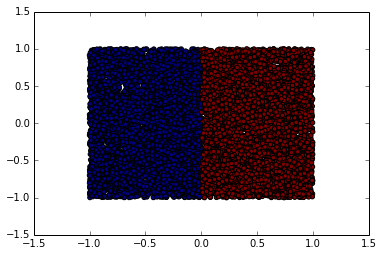

In [32]:
plt.scatter(X[:,0], X[:,1], c=y)

In [47]:
from experiments.experiment_runner import run_experiment, run_experiment_grid
from experiments import experiment_runner, fit_active_learning, fit_grid
from sklearn.svm import SVC

from kaggle_ninja import *
turn_on_force_reload_all()

grid_result_passive = run_experiment("fit_grid",
                                    recalculate_experiments=True,
                                    n_jobs = 4, 
                                    experiment_detailed_name="fit_svm_passive_tiles",
                                    base_experiment="fit_active_learning",
                                    seed=666,
                                    grid_params = {"base_model_kwargs:C": list(np.logspace(-5,5,10)),
                                                   "base_model_kwargs:kernel": ['linear']},
                                    base_experiment_kwargs={"strategy": "random_query",
                                                       "loader_function": "get_splitted_uniform_data",
                                                       "batch_size": 20, \
                                                       "base_model": "SVC",
                                                       "loader_args": {"n_folds": 2}})

TypeError: run is missing value(s) for ['recalculate_experiments', 'experiment_detailed_name', 'seed', 'n_jobs', 'single_fit_timeout', 'grid_params', 'base_experiment', 'base_experiment_kwargs']